In [1]:
# Importar las librerías necesarias
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA  
from sklearn.cluster import KMeans  


# Cargar y Explorar los Datos
Carga el archivo parquet usando pandas y realiza una exploración inicial de los datos, incluyendo estadísticas descriptivas y visualización de distribuciones.

In [2]:
# Cargar el archivo parquet
file_path = '../../data/processed/merged_inmuebles24_departamentos_20250927.parquet'
df = pd.read_parquet(file_path)

In [3]:
# Exploración inicial de los datos
# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
df.head()


Primeras filas del DataFrame:


precio_mxn  lote_m2  recamaras  baños  estacionamiento  es_amueblado  \
0     12000.0       50        1.0    1.0              1.0             1   
1     34100.0      232        3.0    4.0              2.0             0   
2     26000.0      180        3.0    2.0              2.0             0   
3     32000.0      120        2.0    2.0              2.0             0   
4     23000.0      103        2.0    2.0              2.0             0   

   es_penthouse  cuenta_con_cocina_integral  cuenta_con_sala  \
0             0                           0                1   
1             0                           1                1   
2             0                           1                0   
3             0                           0                1   
4             0                           1                1   

   cuenta_con_closet  ...   P_6A11_M  VPH_2YMASD  POB65_MAS  VPH_CISTER  \
0                  1  ...   8.333333   69.333333  37.666667   79.666667   
1                  1  ...   8.298893   43.387454  26.520295   37.339483   
2                  1  ...  10.782805   70.072398  33.266968   65.097285   
3                  0  ...   1.852174   24.660870  19.478261   21.295652   
4                  1  ...   8.709677   99.645161  73.516129  128.774194   

     P18YM_PB  P18YM_PB_M   P_0A2_F  VPH_NDACMM      POBTOT  _merge  
0  198.000000   89.000000  3.000000   26.666667  253.000000    both  
1  112.332103   53.992620  2.442804   37.815498  238.413284    both  
2  170.669683   82.717195  4.436652   45.744344  316.757919    both  
3   59.426087   29.008696  0.365217   10.469565   94.991304    both  
4  246.483871  125.419355  3.483871   16.548387  368.612903    both  

[5 rows x 119 columns]

In [4]:
# Información general del DataFrame
print("\nInformación general del DataFrame:")
df.info()



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10262 entries, 0 to 10261
Columns: 119 entries, precio_mxn to _merge
dtypes: Int64(1), category(1), float64(96), int64(16), object(5)
memory usage: 9.3+ MB


In [5]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
df.describe(include='all')


Estadísticas descriptivas:


precio_mxn      lote_m2     recamaras         baños  \
count    10262.000000      10184.0  10262.000000  10262.000000   
unique            NaN         <NA>           NaN           NaN   
top               NaN         <NA>           NaN           NaN   
freq              NaN         <NA>           NaN           NaN   
mean     37412.575319   311.287804      1.932664      1.732313   
std      29052.171357  13681.16612      0.832794      0.766697   
min         12.000000          1.0      0.000000      0.000000   
25%      20000.000000         62.0      1.000000      1.000000   
50%      29000.000000         89.0      2.000000      2.000000   
75%      44000.000000        131.0      2.000000      2.000000   
max     447840.000000    1080000.0     23.000000     12.000000   

        estacionamiento  es_amueblado  es_penthouse  \
count      10262.000000  10262.000000  10262.000000   
unique              NaN           NaN           NaN   
top                 NaN           NaN           NaN   
freq                NaN           NaN           NaN   
mean           1.331807      0.308809      0.037615   
std            0.875619      0.462025      0.190271   
min            0.000000      0.000000      0.000000   
25%            1.000000      0.000000      0.000000   
50%            1.000000      0.000000      0.000000   
75%            2.000000      1.000000      0.000000   
max           22.000000      1.000000      1.000000   

        cuenta_con_cocina_integral  cuenta_con_sala  cuenta_con_closet  ...  \
count                 10262.000000     10262.000000       10262.000000  ...   
unique                         NaN              NaN                NaN  ...   
top                            NaN              NaN                NaN  ...   
freq                           NaN              NaN                NaN  ...   
mean                      0.312805         0.541123           0.230267  ...   
std                       0.463658         0.498330           0.421024  ...   
min                       0.000000         0.000000           0.000000  ...   
25%                       0.000000         0.000000           0.000000  ...   
50%                       0.000000         1.000000           0.000000  ...   
75%                       1.000000         1.000000           0.000000  ...   
max                       1.000000         1.000000           1.000000  ...   

            P_6A11_M    VPH_2YMASD     POB65_MAS    VPH_CISTER      P18YM_PB  \
count   10262.000000  10262.000000  10262.000000  10262.000000  10262.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        7.778705     51.361955     26.837893     40.131336    131.813565   
std         7.595733     38.581960     16.611190     40.274219     92.841878   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         5.501779     25.348837     17.302326      4.697674     65.790698   
50%         5.627907     45.589091     21.840000     37.000000    106.941818   
75%         5.723122     50.008772     27.481178     51.096774    134.225681   
max        46.795359    239.347826    127.761905    315.188406    638.388889   

          P18YM_PB_M       P_0A2_F    VPH_NDACMM        POBTOT  _merge  
count   10262.000000  10262.000000  10262.000000  10262.000000   10262  
unique           NaN           NaN           NaN           NaN       1  
top              NaN           NaN           NaN           NaN    both  
freq             NaN           NaN           NaN           NaN   10262  
mean       63.975480      2.707370     32.617956    234.591180     NaN  
std        43.392565      3.361885     22.564828    174.984177     NaN  
min         0.000000      0.000000      0.000000      0.000000     NaN  
25%        32.837209      1.534884     25.069767    147.395349 

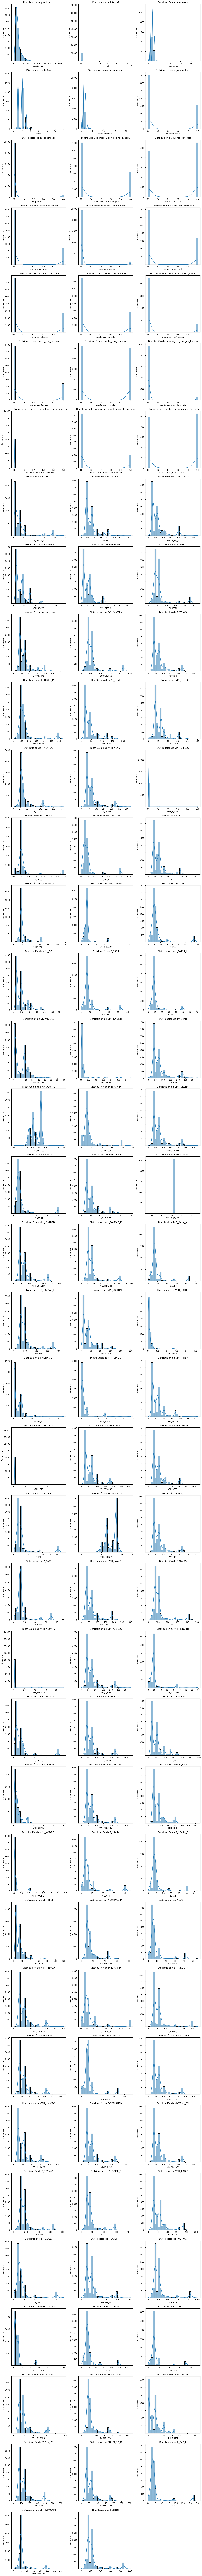

In [6]:
# Visualización de distribuciones
# Seleccionar columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Crear subplots para las columnas numéricas
num_cols = len(numeric_columns)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((num_cols // 3) + 1)))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribución de {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frecuencia")

# Eliminar ejes vacíos si hay menos subplots que espacios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

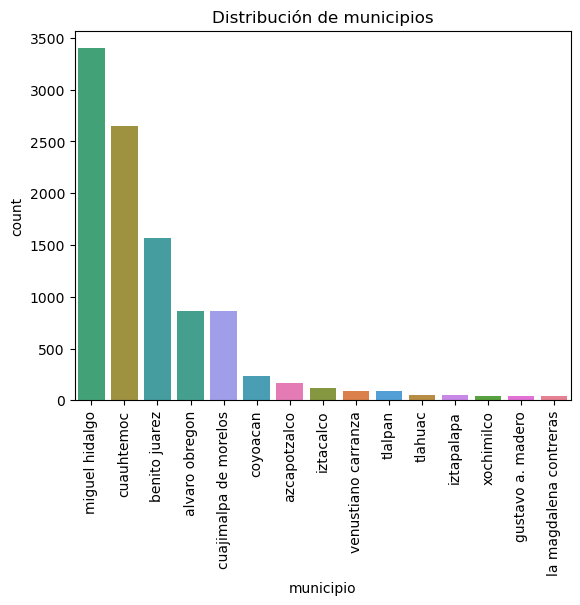

In [7]:
municipio_order = df['municipio'].value_counts().index

sns.countplot(data=df, x='municipio', order=municipio_order, hue='municipio')
plt.xticks(rotation=90)
plt.title('Distribución de municipios')
plt.show()

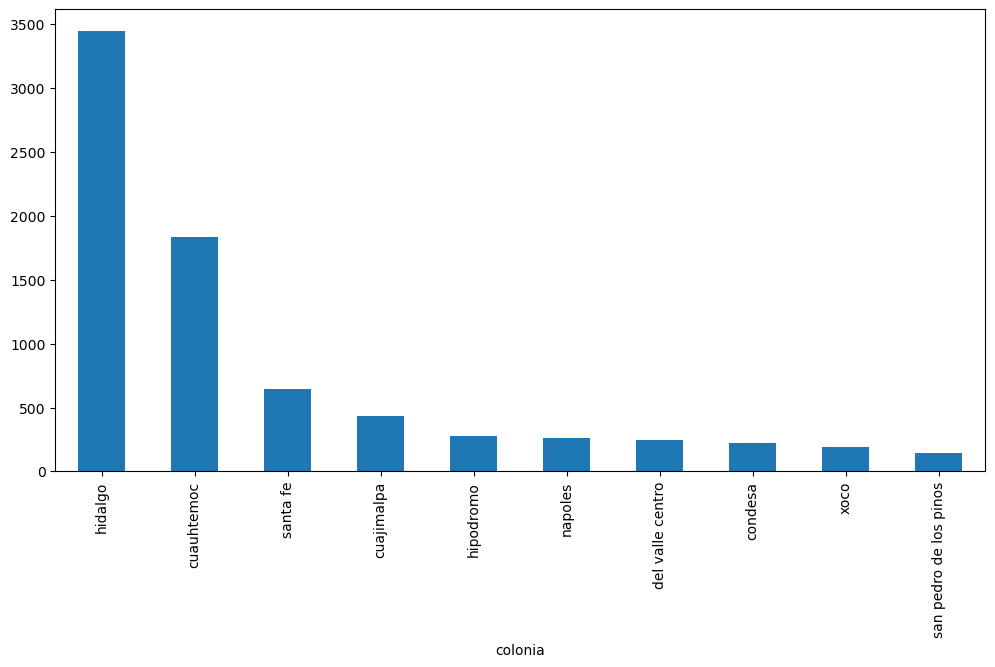

In [8]:
df.colonia.value_counts().head(10).plot(kind='bar', figsize=(12,6))
plt.show()

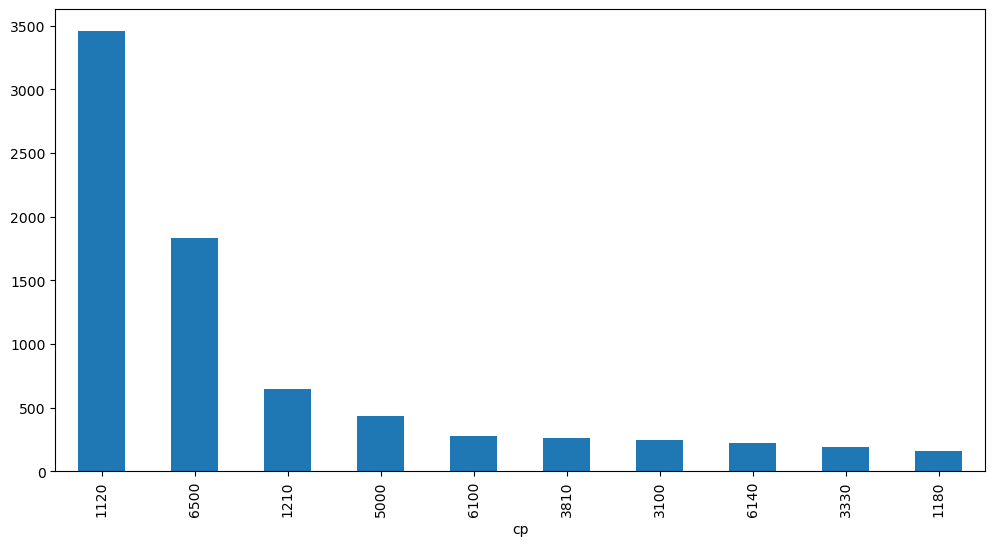

In [9]:
# Un CP puede contener varias colonias, así que nos quedamos sólo con colonias
df.cp.value_counts().head(10).plot(kind='bar', figsize=(12,6))
plt.show()

In [10]:
top10_cols= list(df.colonia.value_counts().head(10).index)

In [11]:
df['colonia_top10'] = df['colonia'].where(df['colonia'].isin(top10_cols), 'otros')

# Preprocesamiento de Datos
Aplica técnicas de limpieza de datos, manejo de valores nulos y codificación de variables categóricas.

In [12]:
# Identificar valores nulos en el DataFrame
print("\nValores nulos por columna:")
df.isnull().sum().sort_values(ascending=False)


Valores nulos por columna:


lote_m2          78
precio_mxn        0
P_18A24_F         0
P_12A14           0
VPH_NODREN        0
                 ..
PHOGJEF_M         0
TOTHOG            0
OCUPVIVPAR        0
VIVPAR_HAB        0
colonia_top10     0
Length: 120, dtype: int64

In [13]:
# outliers
# Función para detectar outliers usando el método del rango intercuartílico (IQR) 
def detectar_outliers_iqr(data, columna):
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]
    return outliers

In [14]:
cols = ['precio_mxn', 'lote_m2', 'recamaras', 'baños', 'estacionamiento']


Número de outliers en precio_mxn: 704
     precio_mxn
87     111960.0
199    121290.0
254    119424.0
268    153012.0
299     95000.0

Número de outliers en lote_m2: 918
     lote_m2
6        273
7        405
33      1200
74       250
108      575

Número de outliers en recamaras: 162
     recamaras
6          5.0
33         6.0
349        4.0
635        4.0
687        4.0

Número de outliers en baños: 190
     baños
1      4.0
6      4.0
349    4.0
389   12.0
430    4.0

Número de outliers en estacionamiento: 162
      estacionamiento
185              22.0
577               4.0
702               4.0
743               4.0
1413              7.0


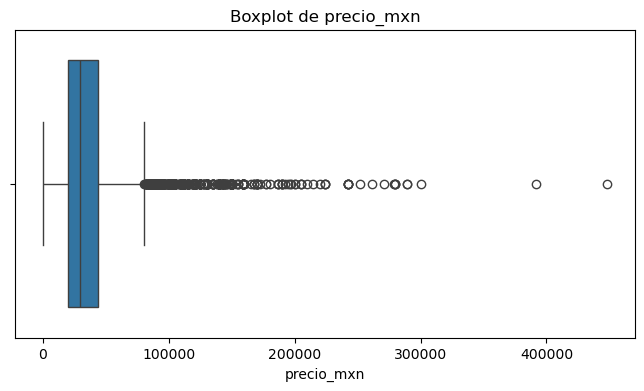

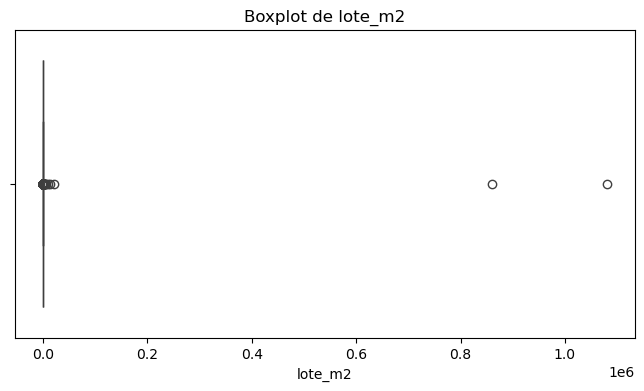

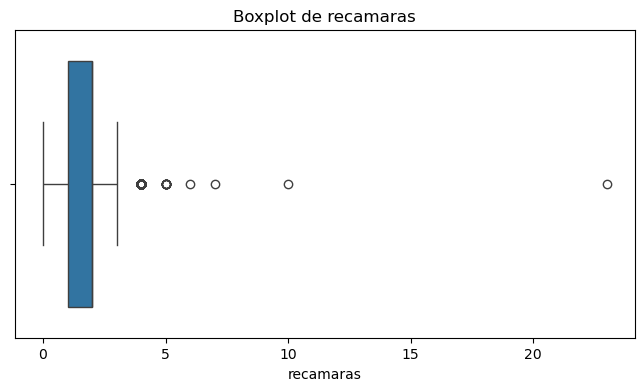

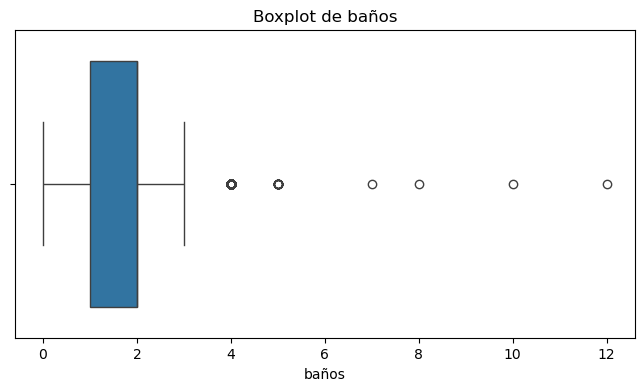

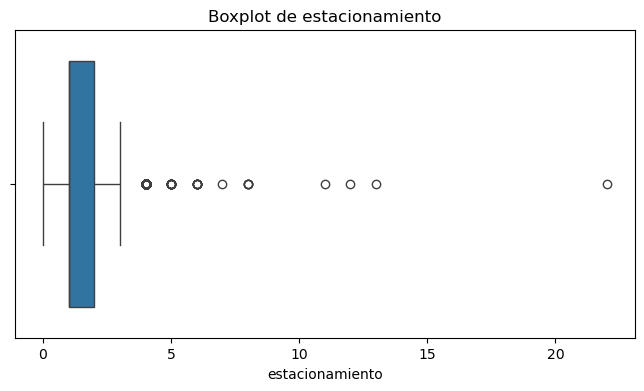

In [15]:
# Aplicar la función a las columnas numéricas
for col in cols:
    outliers = detectar_outliers_iqr(df, col)
    print(f"\nNúmero de outliers en {col}: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers[[col]].head())
    # Visualizar outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")  

identificamos 2 outliers evidentes y muy seprados del resto de los datos en lote_m2, los cuales eliminamos

In [16]:
df.sort_values('lote_m2', ascending=False).head(5)

precio_mxn  lote_m2  recamaras  baños  estacionamiento  es_amueblado  \
4471     22000.0  1080000        3.0    2.0              1.0             0   
5471     26000.0   860000        2.0    2.0              2.0             1   
6971     11000.0    20410        1.0    1.0              0.0             0   
7240     20000.0    13000        2.0    2.0              1.0             0   
1904     37000.0    10000        2.0    2.0              2.0             0   

      es_penthouse  cuenta_con_cocina_integral  cuenta_con_sala  \
4471             0                           0                1   
5471             0                           1                0   
6971             0                           0                0   
7240             0                           0                0   
1904             0                           0                1   

      cuenta_con_closet  ...  VPH_2YMASD  POB65_MAS  VPH_CISTER    P18YM_PB  \
4471                  0  ...   32.483516  22.164835    6.593407   79.923077   
5471                  0  ...   47.287187  23.640648   42.328424  127.902798   
6971                  0  ...   38.647059  24.372549   36.901961  104.078431   
7240                  1  ...   60.160131  29.532680   74.830065  161.186275   
1904                  0  ...   25.348837  17.302326    4.697674   65.790698   

      P18YM_PB_M   P_0A2_F  VPH_NDACMM      POBTOT  _merge  colonia_top10  
4471   38.780220  1.670330   21.824176  160.406593    both          otros  
5471   63.640648  1.916053   30.743741  210.988218    both     cuauhtemoc  
6971   51.254902  1.901961   33.450980  193.352941    both          otros  
7240   77.248366  2.267974   31.748366  222.199346    both          otros  
1904   32.837209  1.534884   25.069767  147.395349    both        hidalgo  

[5 rows x 120 columns]

In [17]:
# Identificar los índices de los dos outliers más grandes
outliers = df.sort_values('lote_m2', ascending=False).head(2).index

In [18]:
# Eliminar los outliers del DataFrame
df = df.drop(outliers)


In [19]:
categorical_columns = list(df.select_dtypes(include=["object", "category"]).columns)
categorical_columns.remove('direccion')

In [20]:
df = pd.get_dummies(df, columns=['municipio','colonia_top10'], drop_first=True)

In [21]:
df.head()

precio_mxn  lote_m2  recamaras  baños  estacionamiento  es_amueblado  \
0     12000.0       50        1.0    1.0              1.0             1   
1     34100.0      232        3.0    4.0              2.0             0   
2     26000.0      180        3.0    2.0              2.0             0   
3     32000.0      120        2.0    2.0              2.0             0   
4     23000.0      103        2.0    2.0              2.0             0   

   es_penthouse  cuenta_con_cocina_integral  cuenta_con_sala  \
0             0                           0                1   
1             0                           1                1   
2             0                           1                0   
3             0                           0                1   
4             0                           1                1   

   cuenta_con_closet  ...  colonia_top10_cuajimalpa  colonia_top10_cuauhtemoc  \
0                  1  ...                     False                     False   
1                  1  ...                     False                     False   
2                  1  ...                     False                     False   
3                  0  ...                     False                     False   
4                  1  ...                     False                     False   

   colonia_top10_del valle centro  colonia_top10_hidalgo  \
0                           False                  False   
1                           False                  False   
2                           False                  False   
3                           False                  False   
4                           False                  False   

   colonia_top10_hipodromo  colonia_top10_napoles  colonia_top10_otros  \
0                    False                  False                 True   
1                    False                  False                 True   
2                    False                  False                 True   
3                    False                  False                 True   
4                    False                  False                 True   

   colonia_top10_san pedro de los pinos  colonia_top10_santa fe  \
0                                 False                   False   
1                                 False                   False   
2                                 False                   False   
3                                 False                   False   
4                                 False                   False   

   colonia_top10_xoco  
0               False  
1               False  
2               False  
3               False  
4               False  

[5 rows x 142 columns]

In [22]:
df.shape

(10260, 142)

# Clustering
Realiza un análisis de clustering para agrupar los datos en diferentes segmentos.

In [23]:
df_analysis = df.drop(['direccion','colonia','precio_mxn','cp','neighbourhood','_merge'], axis=1)

In [24]:
cols = df_analysis.columns

In [25]:
# Escalar los datos
scaler = StandardScaler()
df_analysis[cols] = scaler.fit_transform(df_analysis[cols])

In [26]:
## Arreglar los nulos y quitar esta celda
df_analysis = df_analysis.dropna()

In [27]:
df_analysis.dtypes[120:]

municipio_la magdalena contreras        float64
municipio_miguel hidalgo                float64
municipio_tlahuac                       float64
municipio_tlalpan                       float64
municipio_venustiano carranza           float64
municipio_xochimilco                    float64
colonia_top10_cuajimalpa                float64
colonia_top10_cuauhtemoc                float64
colonia_top10_del valle centro          float64
colonia_top10_hidalgo                   float64
colonia_top10_hipodromo                 float64
colonia_top10_napoles                   float64
colonia_top10_otros                     float64
colonia_top10_san pedro de los pinos    float64
colonia_top10_santa fe                  float64
colonia_top10_xoco                      float64
dtype: object

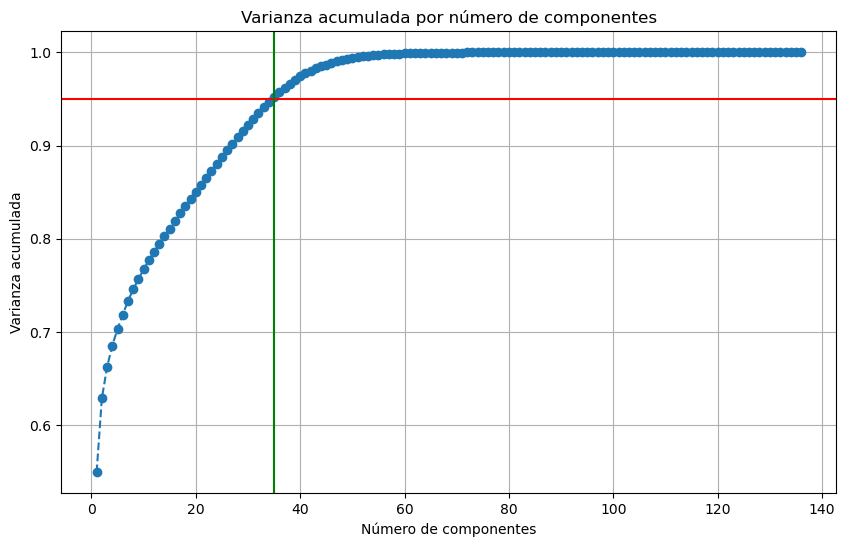

Número óptimo de componentes: 35


In [28]:
# Crear el modelo PCA sin especificar n_components
pca = PCA()
pca.fit(df_analysis)

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

#Gráfica de la varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza acumulada por número de componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95) + 1, color='g', linestyle='-')
plt.grid()
plt.show()

# Elegir el número de componentes que expliquen al menos el 95% de la varianza
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Número óptimo de componentes: {n_components}")



In [29]:
print("Varianza acumulada:")
print(cumulative_variance)


Varianza acumulada:
[0.54985619 0.62888963 0.66260592 0.68563332 0.7033211  0.71854002
 0.73330946 0.74578506 0.7566348  0.76717743 0.77702824 0.78577886
 0.7944837  0.8027999  0.81106215 0.81920847 0.82719378 0.83502933
 0.84277273 0.85040823 0.85793054 0.8653985  0.87282276 0.88017483
 0.88747779 0.89468834 0.90170313 0.90867465 0.91546201 0.92219125
 0.92858053 0.93490829 0.94083096 0.94641373 0.95183134 0.95688887
 0.96176385 0.9661754  0.97047232 0.97405925 0.97734176 0.9802549
 0.98263831 0.98473344 0.98675525 0.98848622 0.9901024  0.9916032
 0.99280665 0.99385995 0.99487172 0.99564097 0.9962897  0.99687177
 0.9973518  0.99774926 0.99806457 0.9983409  0.99854644 0.99871657
 0.99886327 0.99900268 0.99911145 0.99921458 0.99930473 0.99938787
 0.99946782 0.99954129 0.99959561 0.99964472 0.99968826 0.99972867
 0.9997662  0.99979773 0.99982567 0.99984991 0.99987303 0.9998916
 0.9999083  0.99992244 0.99993377 0.99994413 0.99995406 0.99996105
 0.99996755 0.9999727  0.9999774  0.99998112 

In [30]:
# Aplicar PCA con el número óptimo de componentes
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(df_analysis)

In [31]:
# Importancia de cada componente (varianza explicada)
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:")
for i, var in enumerate(explained_variance):
    print(f"Componente {i+1}: {var:.2%}")

Varianza explicada por cada componente:
Componente 1: 54.99%
Componente 2: 7.90%
Componente 3: 3.37%
Componente 4: 2.30%
Componente 5: 1.77%
Componente 6: 1.52%
Componente 7: 1.48%
Componente 8: 1.25%
Componente 9: 1.08%
Componente 10: 1.05%
Componente 11: 0.99%
Componente 12: 0.88%
Componente 13: 0.87%
Componente 14: 0.83%
Componente 15: 0.83%
Componente 16: 0.81%
Componente 17: 0.80%
Componente 18: 0.78%
Componente 19: 0.77%
Componente 20: 0.76%
Componente 21: 0.75%
Componente 22: 0.75%
Componente 23: 0.74%
Componente 24: 0.74%
Componente 25: 0.73%
Componente 26: 0.72%
Componente 27: 0.70%
Componente 28: 0.70%
Componente 29: 0.68%
Componente 30: 0.67%
Componente 31: 0.64%
Componente 32: 0.63%
Componente 33: 0.59%
Componente 34: 0.56%
Componente 35: 0.54%


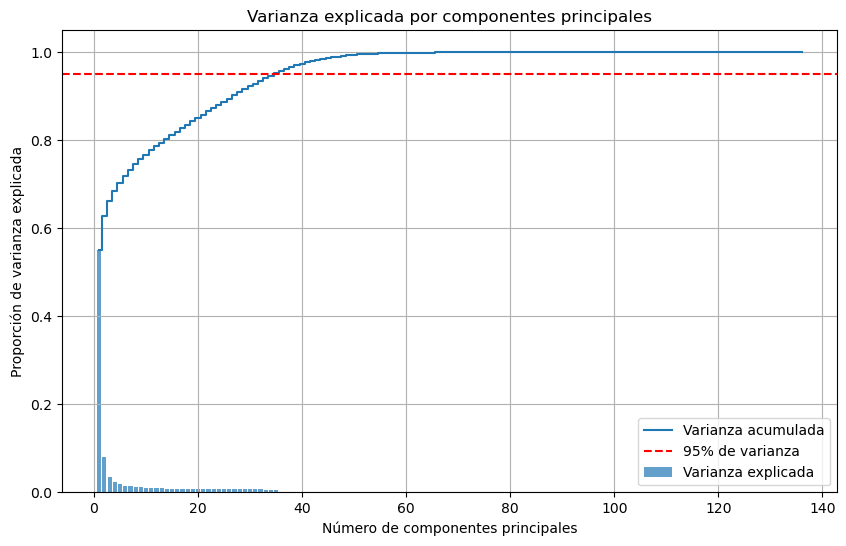

In [32]:
# Gráfica de varianza explicada por cada componente
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Varianza explicada')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Varianza acumulada')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% de varianza')
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.title('Varianza explicada por componentes principales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [42]:
# Contribución de las características originales a los primeros 22 componentes
components = pd.DataFrame(pca.components_[:20], columns=df_analysis.columns)
print("\nContribución de las características originales a los primeros 22 componentes:")
components.T.sort_values(by = 0, ascending=False)


Contribución de las características originales a los primeros 22 componentes:


0         1         2         3         4   \
P_18YMAS                  0.115705  0.020307 -0.016555  0.006577 -0.006459   
P_18YMAS_M                0.115663  0.021544 -0.006478  0.011925 -0.002226   
P_18YMAS_F                0.115617  0.019233 -0.025169  0.001994 -0.010078   
HOGJEF_M                  0.115582 -0.022185 -0.013860  0.007031  0.002073   
PHOGJEF_F                 0.115178  0.015933  0.000404  0.001541 -0.011175   
...                            ...       ...       ...       ...       ...   
municipio_cuauhtemoc     -0.007974 -0.116184  0.229622  0.342857  0.174620   
colonia_top10_hipodromo  -0.009989 -0.053266  0.071726  0.099486  0.150093   
es_amueblado             -0.013541  0.003681  0.031443  0.102108 -0.018390   
municipio_miguel hidalgo -0.050754  0.170655 -0.160264 -0.106331 -0.122704   
colonia_top10_hidalgo    -0.051415  0.172957 -0.160658 -0.107877 -0.121762   

                                5         6         7         8         9   \
P_18YMAS                 -0.012241 -0.013361  0.008000  0.003850 -0.008986   
P_18YMAS_M               -0.008319 -0.018922  0.008109  0.005896 -0.006883   
P_18YMAS_F               -0.015575 -0.008609  0.007903  0.002114 -0.010775   
HOGJEF_M                  0.016498 -0.008107  0.003788  0.004389  0.009783   
PHOGJEF_F                -0.032853 -0.018739  0.010802 -0.010439 -0.026468   
...                            ...       ...       ...       ...       ...   
municipio_cuauhtemoc      0.072617 -0.159062  0.002259  0.159551 -0.074795   
colonia_top10_hipodromo   0.027566 -0.011456 -0.136879  0.007023  0.219036   
es_amueblado              0.091833 -0.141638  0.151390 -0.036136  0.067784   
municipio_miguel hidalgo  0.076491 -0.306678  0.104430 -0.004908  0.047861   
colonia_top10_hidalgo     0.070140 -0.304876  0.105695 -0.001585  0.051094   

                                10        11        12        13        14  \
P_18YMAS                  0.002476 -0.008403 -0.000126 -0.006497  0.009016   
P_18YMAS_M                0.005174 -0.007944  0.000104 -0.005316  0.004174   
P_18YMAS_F                0.000131 -0.008795 -0.000317 -0.007502  0.013149   
HOGJEF_M                  0.002232 -0.006801  0.002754 -0.002585 -0.010357   
PHOGJEF_F                -0.001691 -0.013545  0.004630  0.003809  0.013351   
...                            ...       ...       ...       ...       ...   
municipio_cuauhtemoc      0.035358  0.043480  0.076845 -0.013509 -0.048831   
colonia_top10_hipodromo   0.376308 -0.019849 -0.301769 -0.122677 -0.262740   
es_amueblado             -0.238975  0.002019 -0.291742 -0.134694 -0.071866   
municipio_miguel hidalgo  0.045889 -0.130872 -0.030980 -0.034256 -0.021800   
colonia_top10_hidalgo     0.044120 -0.128137 -0.023637 -0.031377 -0.023826   

                                15        16        17        18        19  
P_18YMAS                 -0.004477  0.001539  0.000357  0.001792 -0.003705  
P_18YMAS_M               -0.002063 -0.000325 -0.003164  0.002412 -0.001758  
P_18YMAS_F               -0.006539  0.003126  0.003370  0.001273 -0.005357  
HOGJEF_M                 -0.000416  0.008050 -0.009754 -0.004001  0.005870  
PHOGJEF_F                -0.000747  0.007219 -0.004035  0.018138 -0.014623  
...                            ...       ...       ...       ...       ...  
municipio_cuauhtemoc     -0.012800 -0.001191 -0.003317  0.008232  0.006386  
colonia_top10_hipodromo   0.299415  0.092658  0.059535 -0.152143 -0.034007  
es_amueblado             -0.131939  0.048549 -0.109515 -0.128028 -0.076145  
municipio_miguel hidalgo  0.085644  0.060056  0.026339  0.037254 -0.014750  
colonia_top10_hidalgo     0.085365  0.052776  0.025621  0.024997 -0.017779  

[136 rows x 20 columns]

In [43]:
most_important_features = components.iloc[0].abs().sort_values(ascending=False).head(20)
print("Características más importantes del primer componente:")
print(most_important_features)

Características más importantes del primer componente:
P_18YMAS      0.115705
P_18YMAS_M    0.115663
P_18YMAS_F    0.115617
HOGJEF_M      0.115582
PHOGJEF_F     0.115178
POBFEM        0.115082
P_15A49_F     0.115036
POBTOT        0.114992
OCUPVIVPAR    0.114982
POBHOG        0.114982
TOTHOG        0.114850
TVIVPARHAB    0.114850
TVIVHAB       0.114850
VIVPARH_CV    0.114838
VPH_C_ELEC    0.114832
VPH_TV        0.114817
VPH_EXCSA     0.114760
POBMAS        0.114753
VPH_DRENAJ    0.114739
VPH_DSADMA    0.114705
Name: 0, dtype: float64


In [35]:
# Reconstrucción aproximada de los datos originales
reconstructed_data = pca.inverse_transform(pca_data)

In [36]:

# Comparar los datos originales con los reconstruidos
print("Datos originales (primeras filas):")
df_analysis.head()

Datos originales (primeras filas):


lote_m2  recamaras     baños  estacionamiento  es_amueblado  es_penthouse  \
0 -0.247414  -1.119825 -0.955050        -0.378897      1.496207     -0.197718   
1  0.388445   1.281806  2.957694         0.763137     -0.668357     -0.197718   
2  0.206771   1.281806  0.349198         0.763137     -0.668357     -0.197718   
3 -0.002853   0.080991  0.349198         0.763137     -0.668357     -0.197718   
4 -0.062247   0.080991  0.349198         0.763137     -0.668357     -0.197718   

   cuenta_con_cocina_integral  cuenta_con_sala  cuenta_con_closet  \
0                   -0.674620         0.920860           1.828097   
1                    1.482315         0.920860           1.828097   
2                    1.482315        -1.085942           1.828097   
3                   -0.674620         0.920860          -0.547017   
4                    1.482315         0.920860           1.828097   

   cuenta_con_balcon  ...  colonia_top10_cuajimalpa  colonia_top10_cuauhtemoc  \
0          -0.233157  ...                 -0.210668                 -0.466385   
1          -0.233157  ...                 -0.210668                 -0.466385   
2          -0.233157  ...                 -0.210668                 -0.466385   
3          -0.233157  ...                 -0.210668                 -0.466385   
4          -0.233157  ...                 -0.210668                 -0.466385   

   colonia_top10_del valle centro  colonia_top10_hidalgo  \
0                       -0.156407              -0.710987   
1                       -0.156407              -0.710987   
2                       -0.156407              -0.710987   
3                       -0.156407              -0.710987   
4                       -0.156407              -0.710987   

   colonia_top10_hipodromo  colonia_top10_napoles  colonia_top10_otros  \
0                -0.166266              -0.162197             1.732501   
1                -0.166266              -0.162197             1.732501   
2                -0.166266              -0.162197             1.732501   
3                -0.166266              -0.162197             1.732501   
4                -0.166266              -0.162197             1.732501   

   colonia_top10_san pedro de los pinos  colonia_top10_santa fe  \
0                             -0.118889               -0.259003   
1                             -0.118889               -0.259003   
2                             -0.118889               -0.259003   
3                             -0.118889               -0.259003   
4                             -0.118889               -0.259003   

   colonia_top10_xoco  
0           -0.137361  
1           -0.137361  
2           -0.137361  
3           -0.137361  
4           -0.137361  

[5 rows x 136 columns]

In [37]:
print("\nDatos reconstruidos (primeras filas):")
pd.DataFrame(reconstructed_data, columns=df_analysis.columns).head()


Datos reconstruidos (primeras filas):


lote_m2  recamaras     baños  estacionamiento  es_amueblado  es_penthouse  \
0 -0.343591  -1.383947 -1.061063        -0.528615      1.201757      0.091775   
1  0.422374   1.551488  1.606189         1.422264     -0.905566      0.273185   
2  0.274115   0.707121  0.686235         0.600109     -0.746000      0.108367   
3  0.089830   0.196505  0.195854         0.434299     -0.627580      0.168615   
4 -0.080723   0.049074  0.315856         0.630130     -0.567789     -0.207817   

   cuenta_con_cocina_integral  cuenta_con_sala  cuenta_con_closet  \
0                   -0.491877        -0.095558           1.677339   
1                    1.935314         0.603629           1.885146   
2                    1.999867        -1.386559           1.894045   
3                   -0.270241         0.687420          -0.357099   
4                    1.555478         0.860514           2.008434   

   cuenta_con_balcon  ...  colonia_top10_cuajimalpa  colonia_top10_cuauhtemoc  \
0          -0.086345  ...                 -0.624048                 -0.897260   
1          -0.112613  ...                 -0.216536                 -0.843210   
2          -0.268660  ...                 -0.089327                 -0.885155   
3          -0.246350  ...                 -0.741994                 -0.831203   
4          -0.296531  ...                 -0.302634                 -0.424892   

   colonia_top10_del valle centro  colonia_top10_hidalgo  \
0                       -0.365947              -0.601129   
1                       -1.041799              -0.095821   
2                       -0.604042              -0.331183   
3                       -0.769457              -0.448636   
4                       -0.072137              -1.129295   

   colonia_top10_hipodromo  colonia_top10_napoles  colonia_top10_otros  \
0                -0.032490              -0.540389             2.076821   
1                -0.386042              -0.819350             1.927388   
2                -0.321663              -0.474213             1.941138   
3                -0.174639              -0.510918             2.180509   
4                 0.122805              -0.203915             2.491747   

   colonia_top10_san pedro de los pinos  colonia_top10_santa fe  \
0                              0.228183                0.360643   
1                             -0.345020                0.647975   
2                             -0.388678                0.282324   
3                             -0.377845                0.656425   
4                             -0.591292               -0.874277   

   colonia_top10_xoco  
0           -0.556878  
1           -1.109594  
2           -0.515332  
3           -1.154729  
4           -0.090727  

[5 rows x 136 columns]

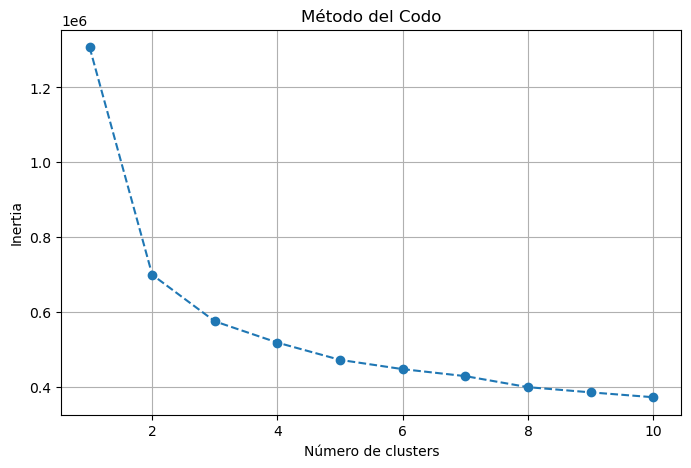

In [38]:
# Calcular la inertia para diferentes números de clusters
inertia = []
for k in range(1, 11):  # Probar de 1 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)  # Usa los datos reducidos por PCA
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.title('Método del Codo')
plt.grid()
plt.show()

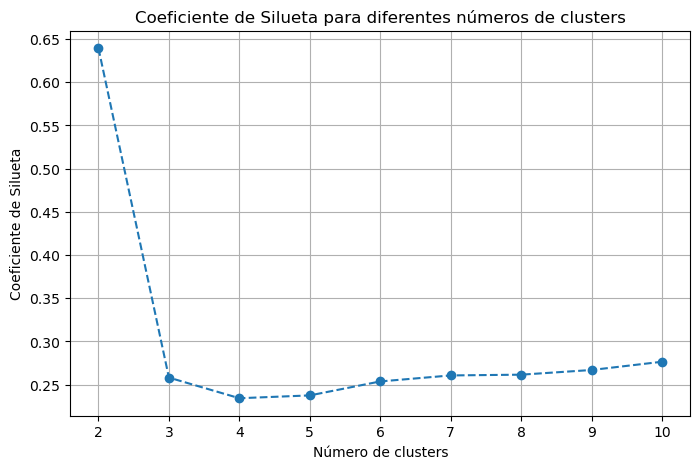

In [39]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de silueta para diferentes números de clusters
silhouette_scores = []
for k in range(2, 11):  # Probar de 2 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    score = silhouette_score(pca_data, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para diferentes números de clusters')
plt.grid()
plt.show()

In [40]:
# Aplicar el algoritmo K-Means para clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(df_analysis)

/var/folders/c7/mdvpp7_n2dj49y88d6cj51kc0000gn/T/ipykernel_17444/1743315256.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_analysis['Cluster'] = clusters


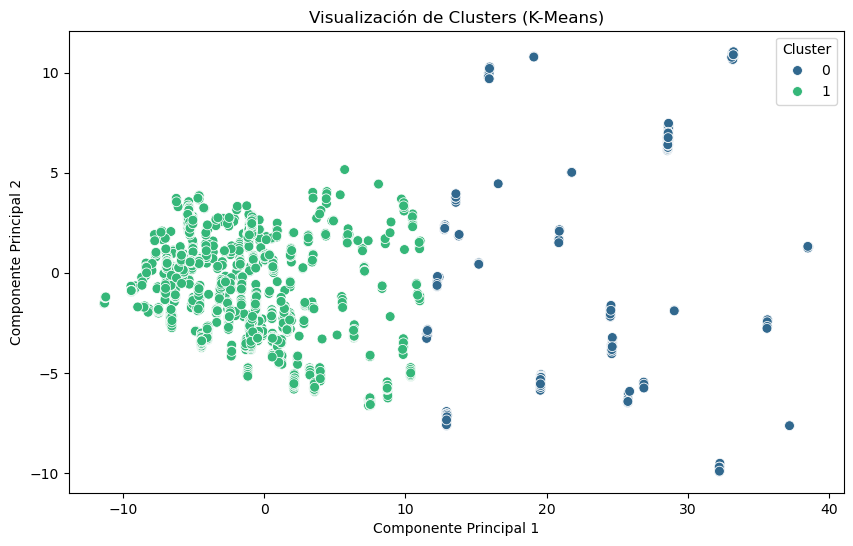

In [44]:

# Agregar los clusters al DataFrame original
df_analysis['Cluster'] = clusters

# Visualizar los clusters en el espacio reducido por PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette="viridis", s=50)
plt.title("Visualización de Clusters (K-Means)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()

In [45]:
import plotly.express as px

# Crear un DataFrame con los datos de PCA y clusters
df_pca = pd.DataFrame(pca_data[:,:3], columns=['PC1', 'PC2', 'PC3'])  # Asegúrate de que pca_data tenga al menos 3 componentes
df_pca['Cluster'] = clusters  # Agregar los clusters al DataFrame

# Graficar en 3D con plotly
fig = px.scatter_3d(
    df_pca,
    x='PC1', y='PC2', z='PC3',  # Ejes del gráfico
    color='Cluster',            # Colorear por cluster
    title="Visualización de Clusters en 3D (K-Means)",
    opacity=0.3,                # Transparencia de los puntos
    size_max=1,                 # Tamaño máximo de los puntos
    symbol_sequence=['circle'], # Usar círculos como símbolo
    color_continuous_scale='Viridis'  # Paleta de colores
)

# Ajustar el tamaño del gráfico
fig.update_layout(
    width=600,  # Ancho del gráfico
    height=600   # Alto del gráfico
)

# Mostrar el gráfico interactivo
fig.show()

In [47]:
# Mostrar el tamaño de cada cluster
cluster_sizes = df_analysis['Cluster'].value_counts()
print("\nTamaño de cada cluster:")
cluster_sizes


Tamaño de cada cluster:


Cluster
1    9277
0     905
Name: count, dtype: int64

In [48]:
# Calcular las características promedio de cada cluster
numeric_columns = df_analysis.select_dtypes('number')
cluster_means = numeric_columns.groupby(df_analysis['Cluster']).mean()
cluster_means.T

Cluster                                      0         1
lote_m2                              -0.007343  0.000716
recamaras                             0.086298 -0.005346
baños                                 0.212288 -0.014788
estacionamiento                       0.379514 -0.032975
es_amueblado                         -0.350249  0.031854
...                                        ...       ...
colonia_top10_otros                   0.137404 -0.013531
colonia_top10_san pedro de los pinos -0.118889  0.011678
colonia_top10_santa fe               -0.259003  0.024336
colonia_top10_xoco                    1.419898 -0.137361
Cluster                               0.000000  1.000000

[137 rows x 2 columns]